### Regression Practise Problem

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import  train_test_split
from keras.callbacks import TensorBoard

#### Importing Data

In [2]:
df = pd.read_csv('dataset_regression.csv')

In [3]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,...,saldo_medio_var13_medio_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var33_hace3,saldo_medio_var33_ult3,saldo_medio_var44_hace3,var38,TARGET_Regression
0,142882,2,55,30.0,17.73,17.73,0.00,0.0,17.73,17.73,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59375.97,2807855.303
1,116073,2,26,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117951.42,0.000
2,40727,2,31,180.0,1051.86,1145.91,0.00,0.0,1051.86,1145.91,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81164.61,0.000
3,96753,89,55,0.0,1353.03,1998.81,990.75,0.0,362.28,362.28,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,137912.85,0.000
4,105319,2,24,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40407.66,0.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19805 entries, 0 to 19804
Columns: 215 entries, ID to TARGET_Regression
dtypes: float64(63), int64(152)
memory usage: 32.5 MB


In [7]:
df['ID'].nunique()

19805

In [106]:
X = df.iloc[:,1:-1]
y = df['TARGET_Regression']

In [16]:
y.value_counts()

0.000          17997
2602368.668        1
5519062.094        1
4973146.139        1
1854787.059        1
               ...  
1902986.726        1
4040580.102        1
2925836.780        1
5518526.723        1
4549110.800        1
Name: TARGET_Regression, Length: 1809, dtype: int64

In [107]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [108]:
X_train.shape

(13863, 213)

#### Libraries

In [67]:
from keras.layers import Dense, Activation, BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [31]:
import keras

In [69]:
def metrics(y_true, y_pred):
    print('MAE:', mean_absolute_error(y_true, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_true, y_pred))
    print('MSE:', mean_squared_error(y_true, y_pred))
    print('RSME:', np.sqrt(mean_squared_error(y_true, y_pred)))
    print('R2 Score:', r2_score(y_true, y_pred))
    

def deep_model(activation, nodes, opti, batch_size, epoch):
    model = Sequential()
    for i in range(len(nodes)): #Add input layer and hidden layer
        if i == 0:
            model.add(Dense(nodes[i], input_dim = 213))
            model.add(BatchNormalization())
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes[i]))
            model.add(BatchNormalization())
            model.add(Activation(activation))
            
    early_stop = EarlyStopping(monitor='val_root_mean_squared_error', mode='min', verbose=1, patience=25)
    
    model.add(Dense(1))
    print(model)
    #Compile
    model.compile(optimizer = opti, loss = 'mse', metrics = [keras.metrics.RootMeanSquaredError()])
    
    model.fit(X_train, y_train, batch_size = batch_size, epochs = epoch, verbose = 1, validation_data = (X_test, y_test), callbacks = [early_stop])
    
    loss = pd.DataFrame(model.history.history)
    
    weight = model.get_weights()
    
    train_pred = model.predict(X_train)
    
    test_pred = model.predict(X_test)
    
    actual = [y_train, y_test]
    
    pred = [train_pred, test_pred]
    
    value = ['Train', 'Test']
    
    for i in range(2):
        
        print(value[i])
        
        metrics(actual[i], pred[i])
        
        print('\n')

    return loss, weight

In [38]:
#model
loss  = deep_model(activation='relu', nodes=[250, 300, 200, 100], opti = 'adam', batch_size = 256, epoch = 10)

Epoch 1/10
55/55 [==============================] - 3s 21ms/step - loss: 942039801303625.1250 - root_mean_squared_error: 29851469.1696 - val_loss: 36193374830592.0000 - val_root_mean_squared_error: 6016093.0000
Epoch 2/10
55/55 [==============================] - 0s 8ms/step - loss: 86087109481033.1406 - root_mean_squared_error: 9076922.1161 - val_loss: 45402007011328.0000 - val_root_mean_squared_error: 6738101.0000
Epoch 3/10
55/55 [==============================] - 0s 8ms/step - loss: 7171891265536.0000 - root_mean_squared_error: 2658831.8036 - val_loss: 292409124585472.0000 - val_root_mean_squared_error: 17099974.0000
Epoch 4/10
55/55 [==============================] - 0s 8ms/step - loss: 58601805763145.1406 - root_mean_squared_error: 7312168.3281 - val_loss: 82122920427520.0000 - val_root_mean_squared_error: 9062170.0000
Epoch 5/10
55/55 [==============================] - 0s 8ms/step - loss: 76362935997001.1406 - root_mean_squared_error: 8449598.3571 - val_loss: 22051297427456.0000 

<AxesSubplot:>

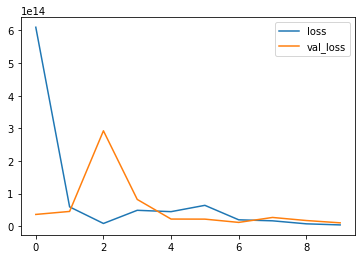

In [41]:
loss[['loss', 'val_loss']].plot()

<AxesSubplot:>

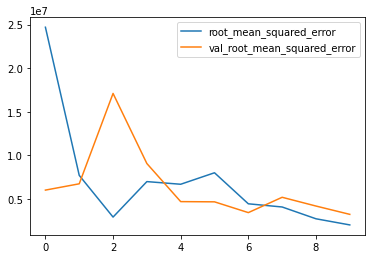

In [44]:
loss[['root_mean_squared_error', 'val_root_mean_squared_error']].plot()

In [46]:
loss  = deep_model(activation='relu', nodes=[250, 300, 200, 100], opti = 'adam', batch_size = 256, epoch = 100)

Epoch 1/100
55/55 [==============================] - 2s 17ms/step - loss: 535560957160886.8750 - root_mean_squared_error: 22120333.6429 - val_loss: 99377590829056.0000 - val_root_mean_squared_error: 9968831.0000
Epoch 2/100
55/55 [==============================] - 0s 9ms/step - loss: 179084661391360.0000 - root_mean_squared_error: 12983183.7969 - val_loss: 362923729879040.0000 - val_root_mean_squared_error: 19050558.0000
Epoch 3/100
55/55 [==============================] - 0s 9ms/step - loss: 206344125827364.5625 - root_mean_squared_error: 13475827.6071 - val_loss: 118066293768192.0000 - val_root_mean_squared_error: 10865831.0000
Epoch 4/100
55/55 [==============================] - 0s 9ms/step - loss: 60076750798848.0000 - root_mean_squared_error: 7604317.5491 - val_loss: 26137681985536.0000 - val_root_mean_squared_error: 5112502.5000
Epoch 5/100
55/55 [==============================] - 1s 10ms/step - loss: 10145615436653.7148 - root_mean_squared_error: 3145555.2522 - val_loss: 1877783

55/55 [==============================] - 1s 9ms/step - loss: 8548451294061.7139 - root_mean_squared_error: 2902710.5469 - val_loss: 5999617376256.0000 - val_root_mean_squared_error: 2449411.7500
Epoch 80/100
55/55 [==============================] - 0s 8ms/step - loss: 5118772229851.4287 - root_mean_squared_error: 2249783.2388 - val_loss: 3074071461888.0000 - val_root_mean_squared_error: 1753303.0000
Epoch 81/100
55/55 [==============================] - 0s 8ms/step - loss: 4934163309714.2861 - root_mean_squared_error: 2208733.4397 - val_loss: 3449080512512.0000 - val_root_mean_squared_error: 1857170.0000
Epoch 82/100
55/55 [==============================] - 0s 8ms/step - loss: 4898198707053.7139 - root_mean_squared_error: 2199614.5089 - val_loss: 3178625761280.0000 - val_root_mean_squared_error: 1782870.1250
Epoch 83/100
55/55 [==============================] - 0s 9ms/step - loss: 4095770212059.4287 - root_mean_squared_error: 2020019.9018 - val_loss: 3155979927552.0000 - val_root_mean_s

<AxesSubplot:>

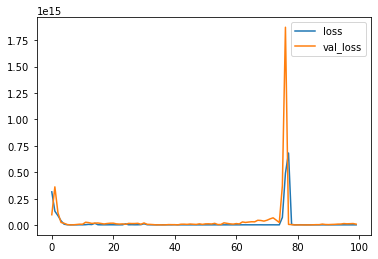

In [47]:
loss[['loss', 'val_loss']].plot()

<AxesSubplot:>

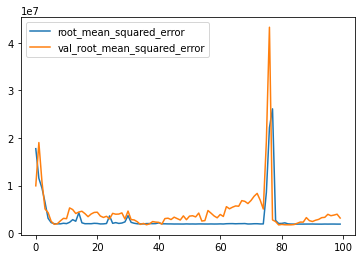

In [48]:

loss[['root_mean_squared_error', 'val_root_mean_squared_error']].plot()

In [49]:
#model 2
loss  = deep_model(activation='relu', nodes=[250, 500, 500, 300, 200, 150, 50], opti = 'adam', batch_size = 256, epoch = 100)

Epoch 1/100
55/55 [==============================] - 4s 33ms/step - loss: 175610973388800.0000 - root_mean_squared_error: 12686499.2679 - val_loss: 23076618108928.0000 - val_root_mean_squared_error: 4803813.0000
Epoch 2/100
55/55 [==============================] - 1s 22ms/step - loss: 29695853941321.1445 - root_mean_squared_error: 5344606.0603 - val_loss: 12364103548928.0000 - val_root_mean_squared_error: 3516262.7500
Epoch 3/100
55/55 [==============================] - 1s 22ms/step - loss: 4042806689792.0000 - root_mean_squared_error: 2004344.3996 - val_loss: 15878689128448.0000 - val_root_mean_squared_error: 3984807.2500
Epoch 4/100
55/55 [==============================] - 1s 24ms/step - loss: 4211118271926.8569 - root_mean_squared_error: 2048631.9040 - val_loss: 8206794883072.0000 - val_root_mean_squared_error: 2864750.5000
Epoch 5/100
55/55 [==============================] - 1s 22ms/step - loss: 3412739665334.8569 - root_mean_squared_error: 1840671.0737 - val_loss: 69154841296896.0

Epoch 79/100
55/55 [==============================] - 1s 22ms/step - loss: 3263166592731.4287 - root_mean_squared_error: 1801900.6049 - val_loss: 52964911742976.0000 - val_root_mean_squared_error: 7277699.5000
Epoch 80/100
55/55 [==============================] - 1s 22ms/step - loss: 5284965805494.8574 - root_mean_squared_error: 2250058.6629 - val_loss: 4932446978048.0000 - val_root_mean_squared_error: 2220911.2500
Epoch 81/100
55/55 [==============================] - 1s 22ms/step - loss: 3067612701842.2856 - root_mean_squared_error: 1747686.4710 - val_loss: 21057092190208.0000 - val_root_mean_squared_error: 4588800.5000
Epoch 82/100
55/55 [==============================] - 1s 20ms/step - loss: 2875312631222.8569 - root_mean_squared_error: 1689442.2165 - val_loss: 5791995658240.0000 - val_root_mean_squared_error: 2406656.5000
Epoch 83/100
55/55 [==============================] - 1s 26ms/step - loss: 4046950835346.2856 - root_mean_squared_error: 2007046.6272 - val_loss: 48089335332864.0

<AxesSubplot:>

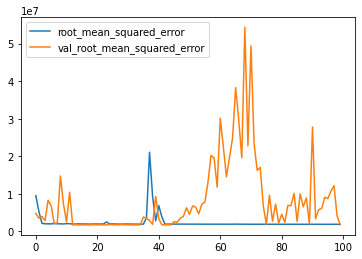

In [50]:
loss[['root_mean_squared_error', 'val_root_mean_squared_error']].plot()

In [56]:
#model 3
loss  = deep_model(activation='relu', nodes=[250, 300, 300, 200, 50], opti = 'adam', batch_size = 28, epoch = 100)

Epoch 1/100
496/496 [==============================] - 5s 6ms/step - loss: 3440573968967956.0000 - root_mean_squared_error: 56673377.3260 - val_loss: 2138140617736192.0000 - val_root_mean_squared_error: 46240032.0000
Epoch 2/100
496/496 [==============================] - 2s 5ms/step - loss: 3404140637269068.0000 - root_mean_squared_error: 52002170.7882 - val_loss: 9874615304192.0000 - val_root_mean_squared_error: 3142390.0000
Epoch 3/100
496/496 [==============================] - 2s 5ms/step - loss: 97742935980167.9844 - root_mean_squared_error: 9271678.2017 - val_loss: 42380682067968.0000 - val_root_mean_squared_error: 6510044.5000
Epoch 4/100
496/496 [==============================] - 3s 6ms/step - loss: 29862630273790.4531 - root_mean_squared_error: 5067471.6004 - val_loss: 8025284280320.0000 - val_root_mean_squared_error: 2832893.2500
Epoch 5/100
496/496 [==============================] - 3s 5ms/step - loss: 22879793828524.0391 - root_mean_squared_error: 4333430.9786 - val_loss: 35

496/496 [==============================] - 2s 4ms/step - loss: 3425521071604.6680 - root_mean_squared_error: 1842653.3393 - val_loss: 3047222149120.0000 - val_root_mean_squared_error: 1745629.5000
Epoch 79/100
496/496 [==============================] - 2s 4ms/step - loss: 3008217865333.4404 - root_mean_squared_error: 1714428.5929 - val_loss: 3009608941568.0000 - val_root_mean_squared_error: 1734822.5000
Epoch 80/100
496/496 [==============================] - 2s 4ms/step - loss: 3275147349809.9639 - root_mean_squared_error: 1794958.7515 - val_loss: 2998094790656.0000 - val_root_mean_squared_error: 1731500.7500
Epoch 81/100
496/496 [==============================] - 2s 5ms/step - loss: 5950195180690.2861 - root_mean_squared_error: 2350750.7430 - val_loss: 3043696574464.0000 - val_root_mean_squared_error: 1744619.3750
Epoch 82/100
496/496 [==============================] - 3s 5ms/step - loss: 3454938331263083.0000 - root_mean_squared_error: 52902075.2191 - val_loss: 3023596158976.0000 - v

<AxesSubplot:>

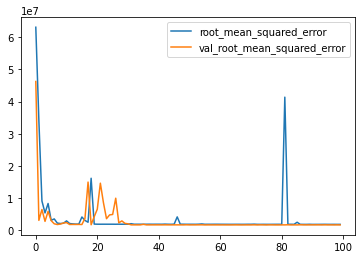

In [57]:
loss[['root_mean_squared_error', 'val_root_mean_squared_error']].plot()

In [59]:
#Model 5
loss, weight  = deep_model(activation='elu', nodes=[250, 350, 350, 250, 150, 50], opti = 'adam', batch_size = 28, epoch = 100)

Epoch 1/100
496/496 [==============================] - 7s 9ms/step - loss: 6358403668473860.0000 - root_mean_squared_error: 76034385.9696 - val_loss: 20191199100928.0000 - val_root_mean_squared_error: 4493462.0000
Epoch 2/100
496/496 [==============================] - 4s 9ms/step - loss: 426266054886299.0625 - root_mean_squared_error: 19443918.5025 - val_loss: 7652380770304.0000 - val_root_mean_squared_error: 2766293.7500
Epoch 3/100
496/496 [==============================] - 4s 8ms/step - loss: 551370318305168.7500 - root_mean_squared_error: 19884413.0875 - val_loss: 746271237210112.0000 - val_root_mean_squared_error: 27317966.0000
Epoch 4/100
496/496 [==============================] - 3s 7ms/step - loss: 40233574431383.4375 - root_mean_squared_error: 5903419.8234 - val_loss: 8425964568576.0000 - val_root_mean_squared_error: 2902751.2500
Epoch 5/100
496/496 [==============================] - 4s 8ms/step - loss: 20451355034061.5195 - root_mean_squared_error: 4211760.6893 - val_loss: 67

Epoch 78/100
496/496 [==============================] - 3s 6ms/step - loss: 3254682264590.4224 - root_mean_squared_error: 1799888.8101 - val_loss: 6103826432000.0000 - val_root_mean_squared_error: 2470592.2500
Epoch 79/100
496/496 [==============================] - 5s 10ms/step - loss: 4068922073928.6279 - root_mean_squared_error: 2007290.2082 - val_loss: 7483335639040.0000 - val_root_mean_squared_error: 2735568.5000
Epoch 80/100
496/496 [==============================] - 4s 8ms/step - loss: 3473436667318.8569 - root_mean_squared_error: 1859930.6512 - val_loss: 3602881708032.0000 - val_root_mean_squared_error: 1898125.8750
Epoch 81/100
496/496 [==============================] - 3s 6ms/step - loss: 3600992083885.5854 - root_mean_squared_error: 1891636.7442 - val_loss: 6827016716288.0000 - val_root_mean_squared_error: 2612856.0000
Epoch 82/100
496/496 [==============================] - 3s 6ms/step - loss: 3510590008099.5410 - root_mean_squared_error: 1866615.8355 - val_loss: 614257865523

<AxesSubplot:>

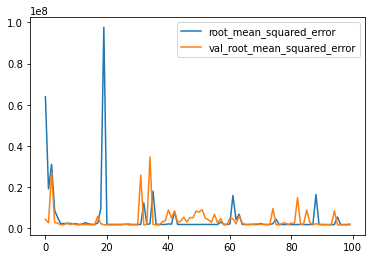

In [62]:
loss[['root_mean_squared_error', 'val_root_mean_squared_error']].plot()

In [70]:
#Model 6
loss, weight  = deep_model(activation='elu', nodes=[250, 550, 500, 350, 250, 250, 100, 50], opti = 'adam', batch_size = 28, epoch = 500)

Epoch 1/500
496/496 [==============================] - 13s 15ms/step - loss: 4767825086229.1191 - root_mean_squared_error: 2167868.8382 - val_loss: 3211237261312.0000 - val_root_mean_squared_error: 1791992.5000
Epoch 2/500
496/496 [==============================] - 7s 14ms/step - loss: 3608087830907.1064 - root_mean_squared_error: 1884903.0289 - val_loss: 3211224154112.0000 - val_root_mean_squared_error: 1791988.8750
Epoch 3/500
496/496 [==============================] - 7s 14ms/step - loss: 4209443567883.8472 - root_mean_squared_error: 2040497.9369 - val_loss: 3211228610560.0000 - val_root_mean_squared_error: 1791990.1250
Epoch 4/500
496/496 [==============================] - 7s 14ms/step - loss: 3588671729144.7886 - root_mean_squared_error: 1886370.9726 - val_loss: 3211195318272.0000 - val_root_mean_squared_error: 1791980.8750
Epoch 5/500
496/496 [==============================] - 7s 15ms/step - loss: 4311234476827.2998 - root_mean_squared_error: 2060208.2719 - val_loss: 321114629734

Epoch 78/500
496/496 [==============================] - 11s 22ms/step - loss: 5052079934292.9902 - root_mean_squared_error: 2208426.2080 - val_loss: 3198532452352.0000 - val_root_mean_squared_error: 1788444.1250
Epoch 79/500
496/496 [==============================] - 10s 21ms/step - loss: 4208267273032.6279 - root_mean_squared_error: 2044516.1509 - val_loss: 3200608894976.0000 - val_root_mean_squared_error: 1789024.6250
Epoch 80/500
496/496 [==============================] - 11s 22ms/step - loss: 4243662804846.4868 - root_mean_squared_error: 2041031.1294 - val_loss: 3198046699520.0000 - val_root_mean_squared_error: 1788308.3750
Epoch 81/500
496/496 [==============================] - 11s 22ms/step - loss: 3809743859852.1045 - root_mean_squared_error: 1947324.2928 - val_loss: 3197646405632.0000 - val_root_mean_squared_error: 1788196.3750
Epoch 82/500
496/496 [==============================] - 11s 21ms/step - loss: 3125859468549.6660 - root_mean_squared_error: 1756703.0825 - val_loss: 319

496/496 [==============================] - 11s 23ms/step - loss: 4835923110658.5752 - root_mean_squared_error: 2177833.0893 - val_loss: 3179896635392.0000 - val_root_mean_squared_error: 1783226.5000
Epoch 155/500
496/496 [==============================] - 11s 23ms/step - loss: 5938849488465.3848 - root_mean_squared_error: 2379458.2704 - val_loss: 3166018732032.0000 - val_root_mean_squared_error: 1779331.0000
Epoch 156/500
496/496 [==============================] - 11s 23ms/step - loss: 5882001403417.7549 - root_mean_squared_error: 2344504.8071 - val_loss: 3167066259456.0000 - val_root_mean_squared_error: 1779625.3750
Epoch 157/500
496/496 [==============================] - 12s 24ms/step - loss: 4107532523759.0020 - root_mean_squared_error: 2019129.8343 - val_loss: 3182088159232.0000 - val_root_mean_squared_error: 1783840.8750
Epoch 158/500
496/496 [==============================] - 13s 25ms/step - loss: 4217818743245.5210 - root_mean_squared_error: 2038115.7364 - val_loss: 316453788057

496/496 [==============================] - 11s 22ms/step - loss: 3510371185769.0786 - root_mean_squared_error: 1856381.3732 - val_loss: 3136288456704.0000 - val_root_mean_squared_error: 1770956.8750
Epoch 231/500
496/496 [==============================] - 11s 21ms/step - loss: 4395674479494.4385 - root_mean_squared_error: 2088455.9401 - val_loss: 3127505321984.0000 - val_root_mean_squared_error: 1768475.3750
Epoch 232/500
496/496 [==============================] - 12s 24ms/step - loss: 3485936932777.4648 - root_mean_squared_error: 1861039.7053 - val_loss: 3129852297216.0000 - val_root_mean_squared_error: 1769138.8750
Epoch 233/500
496/496 [==============================] - 12s 23ms/step - loss: 4527257820705.9961 - root_mean_squared_error: 2093320.3080 - val_loss: 3134339940352.0000 - val_root_mean_squared_error: 1770406.7500
Epoch 234/500
496/496 [==============================] - 11s 23ms/step - loss: 3174305282678.4707 - root_mean_squared_error: 1772321.0020 - val_loss: 312004863590

496/496 [==============================] - 10s 20ms/step - loss: 3223114572913.3198 - root_mean_squared_error: 1789008.1525 - val_loss: 3100616163328.0000 - val_root_mean_squared_error: 1760856.6250
Epoch 307/500
496/496 [==============================] - 10s 21ms/step - loss: 3411214377668.7646 - root_mean_squared_error: 1838144.3156 - val_loss: 3180873646080.0000 - val_root_mean_squared_error: 1783500.3750
Epoch 308/500
496/496 [==============================] - 11s 21ms/step - loss: 3486049972990.4546 - root_mean_squared_error: 1861420.6341 - val_loss: 3159299457024.0000 - val_root_mean_squared_error: 1777441.8750
Epoch 309/500
496/496 [==============================] - 11s 21ms/step - loss: 5420149823838.2617 - root_mean_squared_error: 2240459.6087 - val_loss: 3202617442304.0000 - val_root_mean_squared_error: 1789585.8750
Epoch 310/500
496/496 [==============================] - 11s 22ms/step - loss: 4280852423694.4224 - root_mean_squared_error: 2056230.4278 - val_loss: 318037059174

<AxesSubplot:>

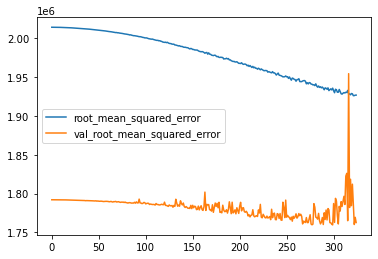

In [72]:
loss[['root_mean_squared_error', 'val_root_mean_squared_error']].plot()

In [117]:
from keras.layers import Dropout

In [118]:
def deep_model_algo(activation, nodes, opti, dropout = False):
    model = Sequential()
    for i in range(len(nodes)): #Add input layer and hidden layer
        if i == 0:
            model.add(Dense(nodes[i], input_dim = 213))
            model.add(BatchNormalization())
            model.add(Activation(activation))
            if dropout:
                model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes[i]))
            model.add(BatchNormalization())
            model.add(Activation(activation))
            if dropout:
                model.add(Dropout(0.3))
            
    early_stop = EarlyStopping(monitor='val_root_mean_squared_error', mode='min', verbose=1, patience=25)
    
    model.add(Dense(1))
    print(model)
    #Compile
    model.compile(optimizer = opti, loss = 'mse', metrics = [keras.metrics.RootMeanSquaredError()])
    return model

In [109]:
#Model 7
model =deep_model_algo(activation='elu', nodes=[250, 500, 350, 250, 150,50], opti = 'adam')

In [110]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_107 (Dense)            (None, 250)               53500     
_________________________________________________________________
batch_normalization_34 (Batc (None, 250)               1000      
_________________________________________________________________
activation_90 (Activation)   (None, 250)               0         
_________________________________________________________________
dense_108 (Dense)            (None, 500)               125500    
_________________________________________________________________
batch_normalization_35 (Batc (None, 500)               2000      
_________________________________________________________________
activation_91 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_109 (Dense)            (None, 350)             

In [77]:
from sklearn.preprocessing import StandardScaler

In [100]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [101]:
X_train

array([[ 0.03397042,  2.48449412, -0.05298904, ..., -0.01891908,
        -0.01316208, -0.20997352],
       [ 0.03397042,  1.41224545, -0.05298904, ..., -0.01891908,
        -0.01316208, -0.67084944],
       [ 0.03397042, -0.88543027, -0.05298904, ..., -0.01891908,
        -0.01316208, -0.30426402],
       ...,
       [ 0.03397042,  2.33131574, -0.05298904, ..., -0.01891908,
        -0.01316208, -0.15945527],
       [ 0.03397042, -0.80884108, -0.05298904, ..., -0.01891908,
        -0.01316208,  0.31790868],
       [ 0.03397042, -0.80884108, -0.05298904, ..., -0.01891908,
        -0.01316208,  0.01909472]])

In [102]:
early_stop = EarlyStopping(monitor='val_root_mean_squared_error', mode='min', verbose=1, patience=25)

In [111]:
model.fit(X_train, y_train, batch_size = 1024, epochs = 100, verbose = 1, validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/100
14/14 [==============================] - 11s 249ms/step - loss: 3741717312307.2002 - root_mean_squared_error: 1933389.1417 - val_loss: 3211222319104.0000 - val_root_mean_squared_error: 1791988.3750
Epoch 2/100
14/14 [==============================] - 2s 128ms/step - loss: 3278131796377.6001 - root_mean_squared_error: 1800441.8750 - val_loss: 3211222319104.0000 - val_root_mean_squared_error: 1791988.3750
Epoch 3/100
14/14 [==============================] - 2s 153ms/step - loss: 4517704499200.0000 - root_mean_squared_error: 2121766.5333 - val_loss: 3211222319104.0000 - val_root_mean_squared_error: 1791988.3750
Epoch 4/100
14/14 [==============================] - 2s 145ms/step - loss: 3587604340189.8667 - root_mean_squared_error: 1891608.9000 - val_loss: 3211222319104.0000 - val_root_mean_squared_error: 1791988.3750
Epoch 5/100
14/14 [==============================] - 2s 128ms/step - loss: 4306271644330.6665 - root_mean_squared_error: 2065913.3833 - val_loss: 3211222319104.000

14/14 [==============================] - 2s 127ms/step - loss: 3745918414574.9331 - root_mean_squared_error: 1931320.5750 - val_loss: 3211211833344.0000 - val_root_mean_squared_error: 1791985.5000
Epoch 41/100
14/14 [==============================] - 2s 124ms/step - loss: 3766828278306.1333 - root_mean_squared_error: 1924276.7250 - val_loss: 3211216551936.0000 - val_root_mean_squared_error: 1791986.7500
Epoch 42/100
14/14 [==============================] - 2s 127ms/step - loss: 4614247852714.6670 - root_mean_squared_error: 2144287.9333 - val_loss: 3211219173376.0000 - val_root_mean_squared_error: 1791987.5000
Epoch 43/100
14/14 [==============================] - 2s 124ms/step - loss: 3549582939477.3335 - root_mean_squared_error: 1881565.4750 - val_loss: 3211219173376.0000 - val_root_mean_squared_error: 1791987.5000
Epoch 44/100
14/14 [==============================] - 2s 138ms/step - loss: 4440017757798.4004 - root_mean_squared_error: 2104393.0833 - val_loss: 3211225726976.0000 - val_r

In [112]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

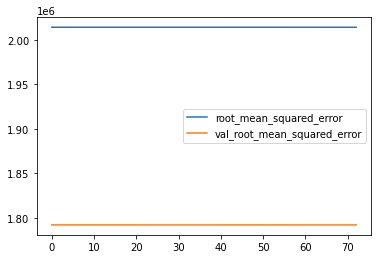

In [113]:
loss[['root_mean_squared_error', 'val_root_mean_squared_error']].plot()

In [114]:
train_pred = model.predict(X_train)

test_pred = model.predict(X_test)

In [115]:
metrics(y_train, train_pred)

MAE: 446908.3274607379
MAPE: 3.37451106825104e+16
MSE: 4056642804488.4956
RSME: 2014110.9215950584
R2 Score: -0.05177919529719932


In [116]:
metrics(y_test, test_pred)

MAE: 432399.6860742007
MAPE: 3.414270682380266e+16
MSE: 3211216734258.901
RSME: 1791986.8119656744
R2 Score: -0.061819178893970594


In [123]:
model =deep_model_algo(activation='relu', nodes=[250, 500, 350, 250, 150,50], opti = 'Adamax', dropout=True)

In [124]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            (None, 250)               53500     
_________________________________________________________________
batch_normalization_58 (Batc (None, 250)               1000      
_________________________________________________________________
activation_114 (Activation)  (None, 250)               0         
_________________________________________________________________
dropout (Dropout)            (None, 250)               0         
_________________________________________________________________
dense_136 (Dense)            (None, 500)               125500    
_________________________________________________________________
batch_normalization_59 (Batc (None, 500)               2000      
_________________________________________________________________
activation_115 (Activation)  (None, 500)             

In [125]:
model.fit(X_train, y_train, batch_size = 1024, epochs = 100, verbose = 1, validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/100
14/14 [==============================] - 16s 398ms/step - loss: 4199386744968.5332 - root_mean_squared_error: 2037912.1167 - val_loss: 3211222843392.0000 - val_root_mean_squared_error: 1791988.5000
Epoch 2/100
14/14 [==============================] - 2s 148ms/step - loss: 3530766015965.8667 - root_mean_squared_error: 1874483.0000 - val_loss: 3211222843392.0000 - val_root_mean_squared_error: 1791988.5000
Epoch 3/100
14/14 [==============================] - 2s 169ms/step - loss: 5244282819925.3330 - root_mean_squared_error: 2268854.2750 - val_loss: 3211222843392.0000 - val_root_mean_squared_error: 1791988.5000
Epoch 4/100
14/14 [==============================] - 2s 170ms/step - loss: 4068789522705.0669 - root_mean_squared_error: 2012885.7833 - val_loss: 3211222843392.0000 - val_root_mean_squared_error: 1791988.5000
Epoch 5/100
14/14 [==============================] - 2s 167ms/step - loss: 3691850061141.3335 - root_mean_squared_error: 1918106.8250 - val_loss: 3211222843392.000

14/14 [==============================] - 2s 141ms/step - loss: 5421118643677.8662 - root_mean_squared_error: 2303425.0833 - val_loss: 3211221270528.0000 - val_root_mean_squared_error: 1791988.1250
Epoch 41/100
14/14 [==============================] - 2s 152ms/step - loss: 3699581054702.9331 - root_mean_squared_error: 1922032.6917 - val_loss: 3211221270528.0000 - val_root_mean_squared_error: 1791988.1250
Epoch 42/100
14/14 [==============================] - 2s 142ms/step - loss: 4110784379835.7334 - root_mean_squared_error: 2021467.8417 - val_loss: 3211221008384.0000 - val_root_mean_squared_error: 1791988.0000
Epoch 43/100
14/14 [==============================] - 2s 153ms/step - loss: 3733595287278.9331 - root_mean_squared_error: 1927436.7417 - val_loss: 3211221008384.0000 - val_root_mean_squared_error: 1791988.0000
Epoch 44/100
14/14 [==============================] - 2s 142ms/step - loss: 4352205879159.4668 - root_mean_squared_error: 2080309.0917 - val_loss: 3211221008384.0000 - val_r

<AxesSubplot:>

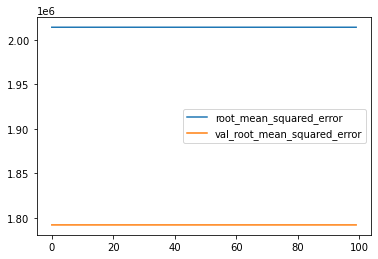

In [126]:
loss = pd.DataFrame(model.history.history)
loss[['root_mean_squared_error', 'val_root_mean_squared_error']].plot()

In [128]:
train_pred = model.predict(X_train)

test_pred = model.predict(X_test)

In [129]:
metrics(y_train, train_pred)

MAE: 446909.7386978362
MAPE: 4.149184078361348e+16
MSE: 4056642984882.0254
RSME: 2014110.9663774797
R2 Score: -0.05177924206842621


In [130]:
metrics(y_test, test_pred)

MAE: 432401.0981567462
MAPE: 4.18483673398527e+16
MSE: 3211214369517.0664
RSME: 1791986.1521554976
R2 Score: -0.06181839696972169


In [131]:
model.get_weights()

[array([[ 0.06358565,  0.01975133,  0.04711816, ..., -0.09215581,
         -0.02302523, -0.07643076],
        [ 0.01091831, -0.00690181, -0.07999425, ...,  0.10025407,
         -0.095982  ,  0.07123847],
        [-0.02965974, -0.11035252, -0.05235533, ...,  0.10240158,
          0.07095922,  0.01769875],
        ...,
        [-0.00647414,  0.04114879,  0.05452669, ..., -0.03092308,
         -0.01520154,  0.05419522],
        [ 0.06494658, -0.04915236,  0.02357221, ..., -0.00744992,
         -0.05019875, -0.03468437],
        [-0.11017363,  0.07310867, -0.01004921, ..., -0.0291709 ,
          0.07237958, -0.05480917]], dtype=float32),
 array([-8.3623556e-03, -2.7467946e-03, -1.2069136e-03,  8.8360580e-04,
         2.6980054e-03,  1.4957096e-03,  5.8571354e-04,  8.9029409e-04,
         6.8799476e-03, -3.2653774e-03, -7.7293385e-03, -5.1688324e-03,
        -9.2763072e-03, -4.3149823e-03,  3.4267644e-03,  1.7233049e-03,
        -4.1702101e-03,  1.9192882e-03, -8.2206831e-04, -8.9248840e-04

In [132]:
model =deep_model_algo(activation='relu', nodes=[214, 200, 300, 200, 150, 150, 100, 50], opti = 'Adam', dropout=True)

In [133]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_142 (Dense)            (None, 214)               45796     
_________________________________________________________________
batch_normalization_64 (Batc (None, 214)               856       
_________________________________________________________________
activation_120 (Activation)  (None, 214)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 214)               0         
_________________________________________________________________
dense_143 (Dense)            (None, 200)               43000     
_________________________________________________________________
batch_normalization_65 (Batc (None, 200)               800       
_________________________________________________________________
activation_121 (Activation)  (None, 200)             

In [138]:
pwd

'/Users/vignaya/Documents/python/Inceptez_Datascience/Class/_10_Deep_Learning/Practise'

In [139]:
logs_directory = 'logs/fits'

board = TensorBoard(log_dir = logs_directory, histogram_freq = 1,
                         write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1)

In [140]:
model.fit(X_train, y_train, batch_size = 1024, epochs = 100, verbose = 1, validation_data = (X_test, y_test), validation_split = 0.3, callbacks = [early_stop, board])

Epoch 1/100
10/10 [==============================] - 16s 441ms/step - loss: 4577449499927.2725 - root_mean_squared_error: 2128760.8295 - val_loss: 2896299819008.0000 - val_root_mean_squared_error: 1701851.8750
Epoch 2/100
10/10 [==============================] - 1s 111ms/step - loss: 4048605985326.5454 - root_mean_squared_error: 2004910.5227 - val_loss: 2896299819008.0000 - val_root_mean_squared_error: 1701851.8750
Epoch 3/100
10/10 [==============================] - 1s 117ms/step - loss: 3567476289163.6362 - root_mean_squared_error: 1876183.5795 - val_loss: 2896299819008.0000 - val_root_mean_squared_error: 1701851.8750
Epoch 4/100
10/10 [==============================] - 1s 131ms/step - loss: 3752629251723.6362 - root_mean_squared_error: 1934079.2841 - val_loss: 2896299819008.0000 - val_root_mean_squared_error: 1701851.8750
Epoch 5/100
10/10 [==============================] - 1s 118ms/step - loss: 4414310067851.6367 - root_mean_squared_error: 2091271.1364 - val_loss: 2896299819008.000

10/10 [==============================] - 1s 113ms/step - loss: 4285530350312.7271 - root_mean_squared_error: 2067467.4659 - val_loss: 2896295100416.0000 - val_root_mean_squared_error: 1701850.5000
Epoch 41/100
10/10 [==============================] - 1s 119ms/step - loss: 5530253358173.0908 - root_mean_squared_error: 2342718.6591 - val_loss: 2896295624704.0000 - val_root_mean_squared_error: 1701850.6250
Epoch 42/100
10/10 [==============================] - 1s 117ms/step - loss: 4593771919918.5459 - root_mean_squared_error: 2141229.2386 - val_loss: 2896295100416.0000 - val_root_mean_squared_error: 1701850.5000
Epoch 43/100
10/10 [==============================] - 1s 116ms/step - loss: 5010258990917.8184 - root_mean_squared_error: 2233453.3182 - val_loss: 2896294576128.0000 - val_root_mean_squared_error: 1701850.3750
Epoch 44/100
10/10 [==============================] - 1s 114ms/step - loss: 4343315681652.3638 - root_mean_squared_error: 2076548.8750 - val_loss: 2896295100416.0000 - val_r

<AxesSubplot:>

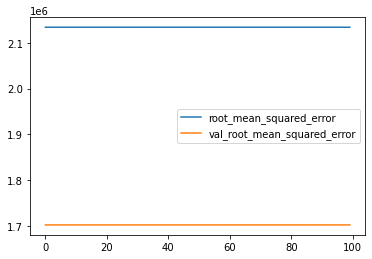

In [141]:
loss = pd.DataFrame(model.history.history)
loss[['root_mean_squared_error', 'val_root_mean_squared_error']].plot()

In [142]:
model.get_weights()

[array([[ 0.01782447,  0.01309787,  0.03068334, ..., -0.03988725,
          0.01166841,  0.04164672],
        [-0.4339135 , -0.35156986, -0.46784803, ...,  0.2150692 ,
         -0.15629105, -0.16235822],
        [ 0.02108134, -0.04802785,  0.10725687, ..., -0.01090097,
         -0.01318679, -0.08731084],
        ...,
        [ 0.01211242, -0.02026237, -0.05243045, ...,  0.00388408,
         -0.06997247,  0.05466876],
        [-0.09383405, -0.01017447,  0.18364327, ..., -0.08200563,
          0.00802462,  0.09735879],
        [-0.16631831, -0.10231302, -0.11532485, ...,  0.16446877,
         -0.09411532, -0.0517787 ]], dtype=float32),
 array([-0.00314901,  0.02799647,  0.0585756 , -0.04357084, -0.00892766,
         0.01814849, -0.0582507 , -0.00810186,  0.00224353,  0.08404331,
         0.04711587, -0.05020546, -0.04261668,  0.02460324,  0.01605999,
         0.01500188,  0.02616806, -0.0855691 ,  0.00915189,  0.03945898,
        -0.00123939,  0.06411555,  0.02646315,  0.0208697 ,  0.067

#### Grid Search CV

In [143]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [144]:
model = KerasRegressor(build_fn = deep_model_algo, verbose = 1)

In [148]:
layers = [[20, 30, 40, 20], [40, 50, 50, 20,], [45, 60, 55, 55, 20]]
activations = ['sigmoid', 'relu']
param_grid = dict(nodes=layers, activation=activations, batch_size = [128, 256], epochs=[30], opti = ['Adam'])
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [147]:
deep_model_algo()

<function __main__.deep_model(activation, nodes, opti, batch_size, epoch)>

In [149]:
grid_result = grid.fit(X_train, y_train)

Epoch 1/30
87/87 [==============================] - 8s 8ms/step - loss: 3840312955252.3638 - root_mean_squared_error: 1954260.5810
Epoch 2/30
87/87 [==============================] - 1s 7ms/step - loss: 3708190667869.0908 - root_mean_squared_error: 1919687.5923
Epoch 3/30
87/87 [==============================] - 1s 7ms/step - loss: 3946275730525.0908 - root_mean_squared_error: 1972165.0724
Epoch 4/30
87/87 [==============================] - 1s 7ms/step - loss: 3117287952756.3638 - root_mean_squared_error: 1764203.1293
Epoch 5/30
87/87 [==============================] - 1s 10ms/step - loss: 3563678159220.3638 - root_mean_squared_error: 1881808.4006
Epoch 6/30
87/87 [==============================] - 1s 9ms/step - loss: 3136782520692.3638 - root_mean_squared_error: 1768209.4588A: 0s - loss: 3623414294118.3999 - root_mean_squared_error: 
Epoch 7/30
87/87 [==============================] - 1s 6ms/step - loss: 2740169089768.7271 - root_mean_squared_error: 1647540.8068
Epoch 8/30
87/87 [====

87/87 [==============================] - 1s 6ms/step - loss: 3522215125736.7271 - root_mean_squared_error: 1873757.1080
Epoch 28/30
87/87 [==============================] - 1s 7ms/step - loss: 4053791561541.8184 - root_mean_squared_error: 2001898.9972
Epoch 29/30
87/87 [==============================] - 1s 8ms/step - loss: 3739389677940.3638 - root_mean_squared_error: 1918122.3423
Epoch 30/30
22/22 [==============================] - 2s 8ms/step - loss: 3613801316352.0000 - root_mean_squared_error: 1901000.1250
Epoch 1/30
87/87 [==============================] - 8s 8ms/step - loss: 4005445179205.8184 - root_mean_squared_error: 1994075.5582
Epoch 2/30
87/87 [==============================] - 1s 7ms/step - loss: 4590081105175.2725 - root_mean_squared_error: 2123209.7131
Epoch 3/30
87/87 [==============================] - 1s 6ms/step - loss: 3745518923403.6362 - root_mean_squared_error: 1928581.9062
Epoch 4/30
87/87 [==============================] - 1s 8ms/step - loss: 5106846433280.0000 

87/87 [==============================] - 1s 7ms/step - loss: 6283480292631.2725 - root_mean_squared_error: 2436870.2770
Epoch 24/30
87/87 [==============================] - 1s 6ms/step - loss: 3849795037370.1816 - root_mean_squared_error: 1954546.8082
Epoch 25/30
87/87 [==============================] - 1s 7ms/step - loss: 4182253946321.4546 - root_mean_squared_error: 2035617.7500
Epoch 26/30
87/87 [==============================] - 1s 8ms/step - loss: 5071119192436.3633 - root_mean_squared_error: 2226249.5312
Epoch 27/30
87/87 [==============================] - 1s 7ms/step - loss: 3991148465803.6362 - root_mean_squared_error: 1987784.6520
Epoch 28/30
87/87 [==============================] - 1s 7ms/step - loss: 4226071184849.4546 - root_mean_squared_error: 2046247.8580
Epoch 29/30
87/87 [==============================] - 1s 7ms/step - loss: 4638171744442.1816 - root_mean_squared_error: 2134154.6676
Epoch 30/30
22/22 [==============================] - 4s 12ms/step - loss: 3495304101888.

87/87 [==============================] - 1s 14ms/step - loss: 4171520862394.1816 - root_mean_squared_error: 2034927.4418
Epoch 19/30
87/87 [==============================] - 1s 14ms/step - loss: 3349554824657.4546 - root_mean_squared_error: 1822089.6662
Epoch 20/30
87/87 [==============================] - 1s 9ms/step - loss: 3678372133422.5454 - root_mean_squared_error: 1913228.2287
Epoch 21/30
87/87 [==============================] - 1s 10ms/step - loss: 4063574827752.7271 - root_mean_squared_error: 2002274.3281
Epoch 22/30
87/87 [==============================] - 1s 11ms/step - loss: 3760376181853.0908 - root_mean_squared_error: 1934823.4105
Epoch 23/30
87/87 [==============================] - 1s 13ms/step - loss: 3807902400512.0000 - root_mean_squared_error: 1943233.1733
Epoch 24/30
87/87 [==============================] - 1s 14ms/step - loss: 4103925229754.1816 - root_mean_squared_error: 2021228.2926
Epoch 25/30
87/87 [==============================] - 1s 13ms/step - loss: 48616194

44/44 [==============================] - 0s 9ms/step - loss: 3061486691578.3110 - root_mean_squared_error: 1748722.0056
Epoch 11/30
44/44 [==============================] - 0s 9ms/step - loss: 3178034125573.6890 - root_mean_squared_error: 1781280.9528
Epoch 12/30
44/44 [==============================] - 0s 11ms/step - loss: 3094686897129.2446 - root_mean_squared_error: 1758084.7472
Epoch 13/30
44/44 [==============================] - 0s 9ms/step - loss: 3217751108630.7554 - root_mean_squared_error: 1792141.7583
Epoch 14/30
44/44 [==============================] - 0s 10ms/step - loss: 2773013766690.1333 - root_mean_squared_error: 1661219.3111: 0s - loss: 2440891155294.3159 - root_mean_squared_error: 155954
Epoch 15/30
44/44 [==============================] - 0s 9ms/step - loss: 3128844866173.1558 - root_mean_squared_error: 1762908.5861
Epoch 16/30
44/44 [==============================] - 0s 7ms/step - loss: 2905097546410.6665 - root_mean_squared_error: 1702457.3722
Epoch 17/30
44/44 [==

44/44 [==============================] - 0s 8ms/step - loss: 4597931264500.6221 - root_mean_squared_error: 2140163.2778
Epoch 4/30
44/44 [==============================] - 0s 9ms/step - loss: 4351178431965.8667 - root_mean_squared_error: 2065409.1833
Epoch 5/30
44/44 [==============================] - 0s 9ms/step - loss: 3557247517400.1777 - root_mean_squared_error: 1878556.6583
Epoch 6/30
44/44 [==============================] - 0s 7ms/step - loss: 3300038063627.3779 - root_mean_squared_error: 1808035.8250
Epoch 7/30
44/44 [==============================] - 0s 7ms/step - loss: 4317092610776.1777 - root_mean_squared_error: 2068894.1194
Epoch 8/30
44/44 [==============================] - 0s 8ms/step - loss: 4610544695887.6445 - root_mean_squared_error: 2134681.4389
Epoch 9/30
44/44 [==============================] - 0s 7ms/step - loss: 3472587238786.8442 - root_mean_squared_error: 1858684.8167
Epoch 10/30
44/44 [==============================] - 1s 15ms/step - loss: 6347022069486.9336 -

11/11 [==============================] - 3s 17ms/step - loss: 3495311179776.0000 - root_mean_squared_error: 1869575.1250
Epoch 1/30
44/44 [==============================] - 13s 11ms/step - loss: 3336131226282.6665 - root_mean_squared_error: 1811224.8944
Epoch 2/30
44/44 [==============================] - 1s 13ms/step - loss: 4762481753383.8223 - root_mean_squared_error: 2171153.6861
Epoch 3/30
44/44 [==============================] - 1s 19ms/step - loss: 4856116231827.9111 - root_mean_squared_error: 2198993.8000
Epoch 4/30
44/44 [==============================] - 1s 20ms/step - loss: 3199647770214.3999 - root_mean_squared_error: 1777549.6361
Epoch 5/30
44/44 [==============================] - 0s 11ms/step - loss: 4196335767460.9775 - root_mean_squared_error: 2040915.3667
Epoch 6/30
44/44 [==============================] - 1s 13ms/step - loss: 3904921950981.6890 - root_mean_squared_error: 1961831.7222
Epoch 7/30
44/44 [==============================] - 0s 8ms/step - loss: 3277461931076.

44/44 [==============================] - 0s 10ms/step - loss: 4286724073062.3999 - root_mean_squared_error: 2065217.1917
Epoch 28/30
44/44 [==============================] - 0s 10ms/step - loss: 3857353463853.5112 - root_mean_squared_error: 1955606.4722
Epoch 29/30
44/44 [==============================] - 0s 10ms/step - loss: 6717713078317.5107 - root_mean_squared_error: 2490976.4639
Epoch 30/30
11/11 [==============================] - 3s 7ms/step - loss: 2844342091776.0000 - root_mean_squared_error: 1686517.7500
Epoch 1/30
44/44 [==============================] - 16s 12ms/step - loss: 3832244070718.5776 - root_mean_squared_error: 1952603.6611
Epoch 2/30
44/44 [==============================] - 1s 16ms/step - loss: 3955998821944.8887 - root_mean_squared_error: 1982691.0667: 0s - loss: 3714812652202.6665 - root_mean_squared_error: 1
Epoch 3/30
44/44 [==============================] - 1s 14ms/step - loss: 4237570080768.0000 - root_mean_squared_error: 2049743.0361
Epoch 4/30
44/44 [======

87/87 [==============================] - 1s 8ms/step - loss: 2749149942877.0908 - root_mean_squared_error: 1645489.5007
Epoch 23/30
87/87 [==============================] - 1s 6ms/step - loss: 2810584551796.3638 - root_mean_squared_error: 1673479.6889
Epoch 24/30
87/87 [==============================] - 1s 12ms/step - loss: 3371200823296.0000 - root_mean_squared_error: 1830706.2841
Epoch 25/30
87/87 [==============================] - 1s 9ms/step - loss: 2897843787589.8184 - root_mean_squared_error: 1699150.2543
Epoch 26/30
87/87 [==============================] - 1s 7ms/step - loss: 3309678504122.1816 - root_mean_squared_error: 1815769.5369
Epoch 27/30
87/87 [==============================] - 1s 6ms/step - loss: 3003539999650.9092 - root_mean_squared_error: 1730266.6023
Epoch 28/30
87/87 [==============================] - 1s 7ms/step - loss: 3053377894958.5454 - root_mean_squared_error: 1744449.6009
Epoch 29/30
87/87 [==============================] - 1s 12ms/step - loss: 3505647769413

Epoch 21/30
87/87 [==============================] - 1s 7ms/step - loss: 5382415278080.0000 - root_mean_squared_error: 2277636.5121
Epoch 22/30
87/87 [==============================] - 1s 8ms/step - loss: 3919723858850.9092 - root_mean_squared_error: 1964072.2372
Epoch 23/30
87/87 [==============================] - 1s 8ms/step - loss: 3798381342347.6362 - root_mean_squared_error: 1939705.9560
Epoch 24/30
87/87 [==============================] - 0s 5ms/step - loss: 3463764605486.5454 - root_mean_squared_error: 1856634.9432
Epoch 25/30
87/87 [==============================] - 1s 6ms/step - loss: 4226305067938.9092 - root_mean_squared_error: 2048898.7159
Epoch 26/30
87/87 [==============================] - 0s 6ms/step - loss: 7764899123572.3633 - root_mean_squared_error: 2651519.6122
Epoch 27/30
87/87 [==============================] - 1s 6ms/step - loss: 4026307590702.5454 - root_mean_squared_error: 2001038.4929
Epoch 28/30
87/87 [==============================] - 0s 5ms/step - loss: 595

87/87 [==============================] - 1s 7ms/step - loss: 4578008736488.7275 - root_mean_squared_error: 2130529.8764
Epoch 20/30
87/87 [==============================] - 1s 7ms/step - loss: 4531509609937.4541 - root_mean_squared_error: 2115668.6577
Epoch 21/30
87/87 [==============================] - 1s 6ms/step - loss: 3521699497425.4546 - root_mean_squared_error: 1869363.5036
Epoch 22/30
87/87 [==============================] - 1s 7ms/step - loss: 3739498717928.7271 - root_mean_squared_error: 1919699.2983
Epoch 23/30
87/87 [==============================] - 1s 6ms/step - loss: 4227996829137.4546 - root_mean_squared_error: 2046611.5426
Epoch 24/30
87/87 [==============================] - 1s 6ms/step - loss: 4509868787153.4541 - root_mean_squared_error: 2116020.8636
Epoch 25/30
87/87 [==============================] - 1s 7ms/step - loss: 4282834955915.6362 - root_mean_squared_error: 2058660.1562
Epoch 26/30
87/87 [==============================] - 0s 5ms/step - loss: 3638843175284.3

Epoch 17/30
87/87 [==============================] - 1s 8ms/step - loss: 4361701505582.5454 - root_mean_squared_error: 2083108.0795
Epoch 18/30
87/87 [==============================] - 1s 6ms/step - loss: 4233948790784.0000 - root_mean_squared_error: 2051666.2827
Epoch 19/30
87/87 [==============================] - 1s 7ms/step - loss: 4095991250944.0000 - root_mean_squared_error: 2018106.2344
Epoch 20/30
87/87 [==============================] - 1s 10ms/step - loss: 3850190030289.4546 - root_mean_squared_error: 1943498.1541
Epoch 21/30
87/87 [==============================] - 1s 8ms/step - loss: 3174420569367.2729 - root_mean_squared_error: 1776772.6293
Epoch 22/30
87/87 [==============================] - 1s 8ms/step - loss: 3594238173928.7271 - root_mean_squared_error: 1892567.7770
Epoch 23/30
87/87 [==============================] - 1s 7ms/step - loss: 3294717088116.3638 - root_mean_squared_error: 1812795.8267
Epoch 24/30
87/87 [==============================] - 1s 6ms/step - loss: 39

87/87 [==============================] - 1s 7ms/step - loss: 3989477547287.2729 - root_mean_squared_error: 1993788.5923
Epoch 15/30
87/87 [==============================] - 1s 7ms/step - loss: 3792765008430.5454 - root_mean_squared_error: 1943032.6193
Epoch 16/30
87/87 [==============================] - 1s 7ms/step - loss: 4052027056872.7271 - root_mean_squared_error: 2008321.7599
Epoch 17/30
87/87 [==============================] - 1s 7ms/step - loss: 3903332122624.0000 - root_mean_squared_error: 1963781.2429
Epoch 18/30
87/87 [==============================] - 1s 7ms/step - loss: 4728777557457.4541 - root_mean_squared_error: 2168522.7401
Epoch 19/30
87/87 [==============================] - 1s 6ms/step - loss: 3447033923025.4546 - root_mean_squared_error: 1849433.7926
Epoch 20/30
87/87 [==============================] - 1s 7ms/step - loss: 5085657101405.0908 - root_mean_squared_error: 2205476.8651
Epoch 21/30
87/87 [==============================] - 1s 7ms/step - loss: 4893188106426.1

44/44 [==============================] - 0s 9ms/step - loss: 5265293192578.8447 - root_mean_squared_error: 2279036.1833
Epoch 8/30
44/44 [==============================] - 0s 11ms/step - loss: 5198851493796.9775 - root_mean_squared_error: 2255517.7722
Epoch 9/30
44/44 [==============================] - 0s 10ms/step - loss: 3759485916137.2446 - root_mean_squared_error: 1932553.1806
Epoch 10/30
44/44 [==============================] - 1s 12ms/step - loss: 3144782962141.8667 - root_mean_squared_error: 1763349.9917
Epoch 11/30
44/44 [==============================] - 0s 10ms/step - loss: 3744954706238.5776 - root_mean_squared_error: 1925604.0944
Epoch 12/30
44/44 [==============================] - 0s 11ms/step - loss: 2995435077632.0000 - root_mean_squared_error: 1720945.4194
Epoch 13/30
44/44 [==============================] - 1s 12ms/step - loss: 3695582924708.9775 - root_mean_squared_error: 1916040.2500
Epoch 14/30
44/44 [==============================] - 1s 13ms/step - loss: 4022407633

44/44 [==============================] - 0s 9ms/step - loss: 3117526126136.8887 - root_mean_squared_error: 1764443.8306
Epoch 3/30
44/44 [==============================] - 0s 10ms/step - loss: 3624495177910.0444 - root_mean_squared_error: 1897425.5694
Epoch 4/30
44/44 [==============================] - 0s 10ms/step - loss: 3538119714406.3999 - root_mean_squared_error: 1876254.0917
Epoch 5/30
44/44 [==============================] - 0s 8ms/step - loss: 2865455251091.9111 - root_mean_squared_error: 1691582.2056
Epoch 6/30
44/44 [==============================] - 0s 8ms/step - loss: 3128144603818.6665 - root_mean_squared_error: 1765614.0389
Epoch 7/30
44/44 [==============================] - 0s 9ms/step - loss: 3456595114939.7334 - root_mean_squared_error: 1855569.4806
Epoch 8/30
44/44 [==============================] - 1s 12ms/step - loss: 3317375568736.7109 - root_mean_squared_error: 1819889.1306
Epoch 9/30
44/44 [==============================] - 1s 12ms/step - loss: 3642698538825.9556

44/44 [==============================] - 0s 8ms/step - loss: 3590962480560.3555 - root_mean_squared_error: 1891177.7972
Epoch 28/30
44/44 [==============================] - 0s 10ms/step - loss: 4011019224132.2666 - root_mean_squared_error: 1999127.8611
Epoch 29/30
44/44 [==============================] - 0s 10ms/step - loss: 3920213323138.8442 - root_mean_squared_error: 1973317.1861
Epoch 30/30
11/11 [==============================] - 2s 5ms/step - loss: 3613787684864.0000 - root_mean_squared_error: 1900996.5000
Epoch 1/30
44/44 [==============================] - 10s 12ms/step - loss: 4711300889895.8223 - root_mean_squared_error: 2153059.3361: 0s - loss: 4960027174502.4004 - root_mean_squared_error: 215624
Epoch 2/30
44/44 [==============================] - 0s 9ms/step - loss: 4609022419854.2227 - root_mean_squared_error: 2140861.6917
Epoch 3/30
44/44 [==============================] - 0s 10ms/step - loss: 4149020263856.3555 - root_mean_squared_error: 2015871.7528
Epoch 4/30
44/44 [===

44/44 [==============================] - 0s 10ms/step - loss: 3576340076589.5112 - root_mean_squared_error: 1883618.8361
Epoch 24/30
44/44 [==============================] - 0s 9ms/step - loss: 4298187402990.9331 - root_mean_squared_error: 2058786.7472
Epoch 25/30
44/44 [==============================] - 0s 8ms/step - loss: 6234784579948.0889 - root_mean_squared_error: 2446911.6500
Epoch 26/30
44/44 [==============================] - 0s 8ms/step - loss: 4238291652516.9775 - root_mean_squared_error: 2053196.9972
Epoch 27/30
44/44 [==============================] - 0s 9ms/step - loss: 3625484258872.8887 - root_mean_squared_error: 1899812.8333
Epoch 28/30
44/44 [==============================] - 0s 8ms/step - loss: 5116914250547.2002 - root_mean_squared_error: 2236466.4000
Epoch 29/30
44/44 [==============================] - 0s 9ms/step - loss: 5486019888196.2666 - root_mean_squared_error: 2331100.0361
Epoch 30/30
11/11 [==============================] - 2s 6ms/step - loss: 3495308034048.

In [150]:
grid.best_params_

{'activation': 'relu',
 'batch_size': 128,
 'epochs': 30,
 'nodes': [45, 60, 55, 55, 20],
 'opti': 'Adam'}

In [152]:
train_pred = grid.predict(X_train)
test_pred = grid.predict(X_test)

47/47 [==============================] - 1s 12ms/step


In [153]:
metrics(train_pred, y_train)

MAE: 447008.1871406827
MAPE: 3677.245939408277
MSE: 4056390608051.0283
RSME: 2014048.313236559
R2 Score: -18171691.510307416


In [154]:
metrics(test_pred, y_test)

MAE: 432501.19304392417
MAPE: 3592.8550959757704
MSE: 3211118976895.1826
RSME: 1791959.5355072008
R2 Score: -23170534.67979681
